# Portofolio: Cohort Analysis - Optimize Customer Retention with Acquisition Time-Based Segmentation in Python

# Business Understanding

## Introduction

Cohort analysis is one of the low complexity but high impact to the business decision. Like RFM analysis, cohort analysis also tries to segment customers based on their characteristics such as channel acquisition or their first time purchase. The group is called cohort. One of the most used variable is transaction date.

## Objectives

This analysis aims to find trend and pattern of customer behaviour based on the month they first time purchased. These objectives include:
- which cohort has the most new customers.
- how much percentage of retention and churn rate month to month.

## Dataset and Tools Needed

We will use seblak prasmanan database. Seblak prasmanan is one of the new traditional Indonesian food. It's a boiled krupuk with various topping and what make seblak prasmanan special is you can take only topping that you like as many as you want.

The tools we need for this analysis is only Python programming language and the library such as numpy, pandas, datetime, matplotlib, and seaborn. 

## Methodology

For this analysis, we only need customer_id and transaction date where later we will do some data preprocessing to find their first time purchase and other metrics. Here are the steps to do cohort analysis:
- find the first time purchase for each customer. name it as cohort month.
- use like distinct function in order to make one customer if purchases many times at the same month, count as one time for transaction month.
- substract the transaction month with cohort month to get cohort index.
- make pivot table so we can see which cohort month has how many customers for each cohort index.

# Data Understanding

## Data Acquisition

In [1]:
import numpy as  np
import pandas as pd
import datetime as dt

In [2]:
df = pd.read_csv('data/seblak_dataset.csv')
print(df.head())

   customer_id transaction_date       city customer_type  purchase
0            7       2023-09-23    Jakarta        member       193
1           22       2023-05-05    Jakarta        member       160
2           31       2023-10-05  Tangerang        member       194
3           50       2023-10-12    Jakarta        member       171
4           13       2023-08-15     Bekasi        member       177


## Data Profiling

In [3]:
# column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       3936 non-null   int64 
 1   transaction_date  3936 non-null   object
 2   city              3936 non-null   object
 3   customer_type     3936 non-null   object
 4   purchase          3936 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 153.9+ KB


In [4]:
# missing value
df.isnull().sum()

customer_id         0
transaction_date    0
city                0
customer_type       0
purchase            0
dtype: int64

In [5]:
# duplicated value
df.duplicated().sum()

np.int64(1)

NOTE:
- transaction_date which means datetime is still an object. we can change data format.
- the data has no missing value
- the data has no duplicated value

In [6]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       3936 non-null   int64         
 1   transaction_date  3936 non-null   datetime64[ns]
 2   city              3936 non-null   object        
 3   customer_type     3936 non-null   object        
 4   purchase          3936 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 153.9+ KB


## Descriptive Statistics

Because our main goal is to understand customer retention using time-based acquisition, we just need customer_id and transaction_date.

In [8]:
df['customer_id'].value_counts()

customer_id
68     28
21     24
136    24
71     23
38     23
       ..
408     1
257     1
543     1
324     1
571     1
Name: count, Length: 552, dtype: int64

In [9]:
df['transaction_date'].value_counts()

transaction_date
2023-11-15    34
2023-12-31    28
2023-12-08    28
2023-10-06    27
2023-12-24    26
              ..
2023-01-05     1
2023-02-20     1
2023-03-29     1
2023-04-06     1
2023-01-02     1
Name: count, Length: 362, dtype: int64

# Data Preprocessing

In [10]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [11]:
df['transaction_month'] = df['transaction_date'].apply(get_month)

In [12]:
group = df.groupby('customer_id')['transaction_month']

In [13]:
df['cohort_month'] = group.transform('min')

In [14]:
print(df.head())

   customer_id transaction_date       city customer_type  purchase  \
0            7       2023-09-23    Jakarta        member       193   
1           22       2023-05-05    Jakarta        member       160   
2           31       2023-10-05  Tangerang        member       194   
3           50       2023-10-12    Jakarta        member       171   
4           13       2023-08-15     Bekasi        member       177   

  transaction_month cohort_month  
0        2023-09-01   2023-01-01  
1        2023-05-01   2023-02-01  
2        2023-10-01   2023-01-01  
3        2023-10-01   2023-01-01  
4        2023-08-01   2023-01-01  


In [15]:
def get_month_int(dframe, column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month, day

In [16]:
invoice_year, invoice_month, _ = get_month_int(df, 'transaction_month')

In [17]:
cohort_year, cohort_month, _ = get_month_int(df, 'cohort_month')

In [18]:
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

In [19]:
df['index_cohort'] = year_diff * 12 + month_diff

In [20]:
print(df.head())

   customer_id transaction_date       city customer_type  purchase  \
0            7       2023-09-23    Jakarta        member       193   
1           22       2023-05-05    Jakarta        member       160   
2           31       2023-10-05  Tangerang        member       194   
3           50       2023-10-12    Jakarta        member       171   
4           13       2023-08-15     Bekasi        member       177   

  transaction_month cohort_month  index_cohort  
0        2023-09-01   2023-01-01             8  
1        2023-05-01   2023-02-01             3  
2        2023-10-01   2023-01-01             9  
3        2023-10-01   2023-01-01             9  
4        2023-08-01   2023-01-01             7  


In [21]:
grouping = df.groupby(['cohort_month', 'index_cohort'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)

In [22]:
cohort_data = cohort_data.reset_index()

In [23]:
cohort_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cohort_month  78 non-null     datetime64[ns]
 1   index_cohort  78 non-null     int32         
 2   customer_id   78 non-null     int64         
dtypes: datetime64[ns](1), int32(1), int64(1)
memory usage: 1.7 KB


In [24]:
cohort_data['cohort_month'] = pd.DatetimeIndex(cohort_data['cohort_month']).to_period('M')

# Modeling

In [25]:
cohort_count = cohort_data.pivot(columns='index_cohort', index='cohort_month', values='customer_id')

In [26]:
retention = cohort_count.divide(cohort_count[0], axis=0)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

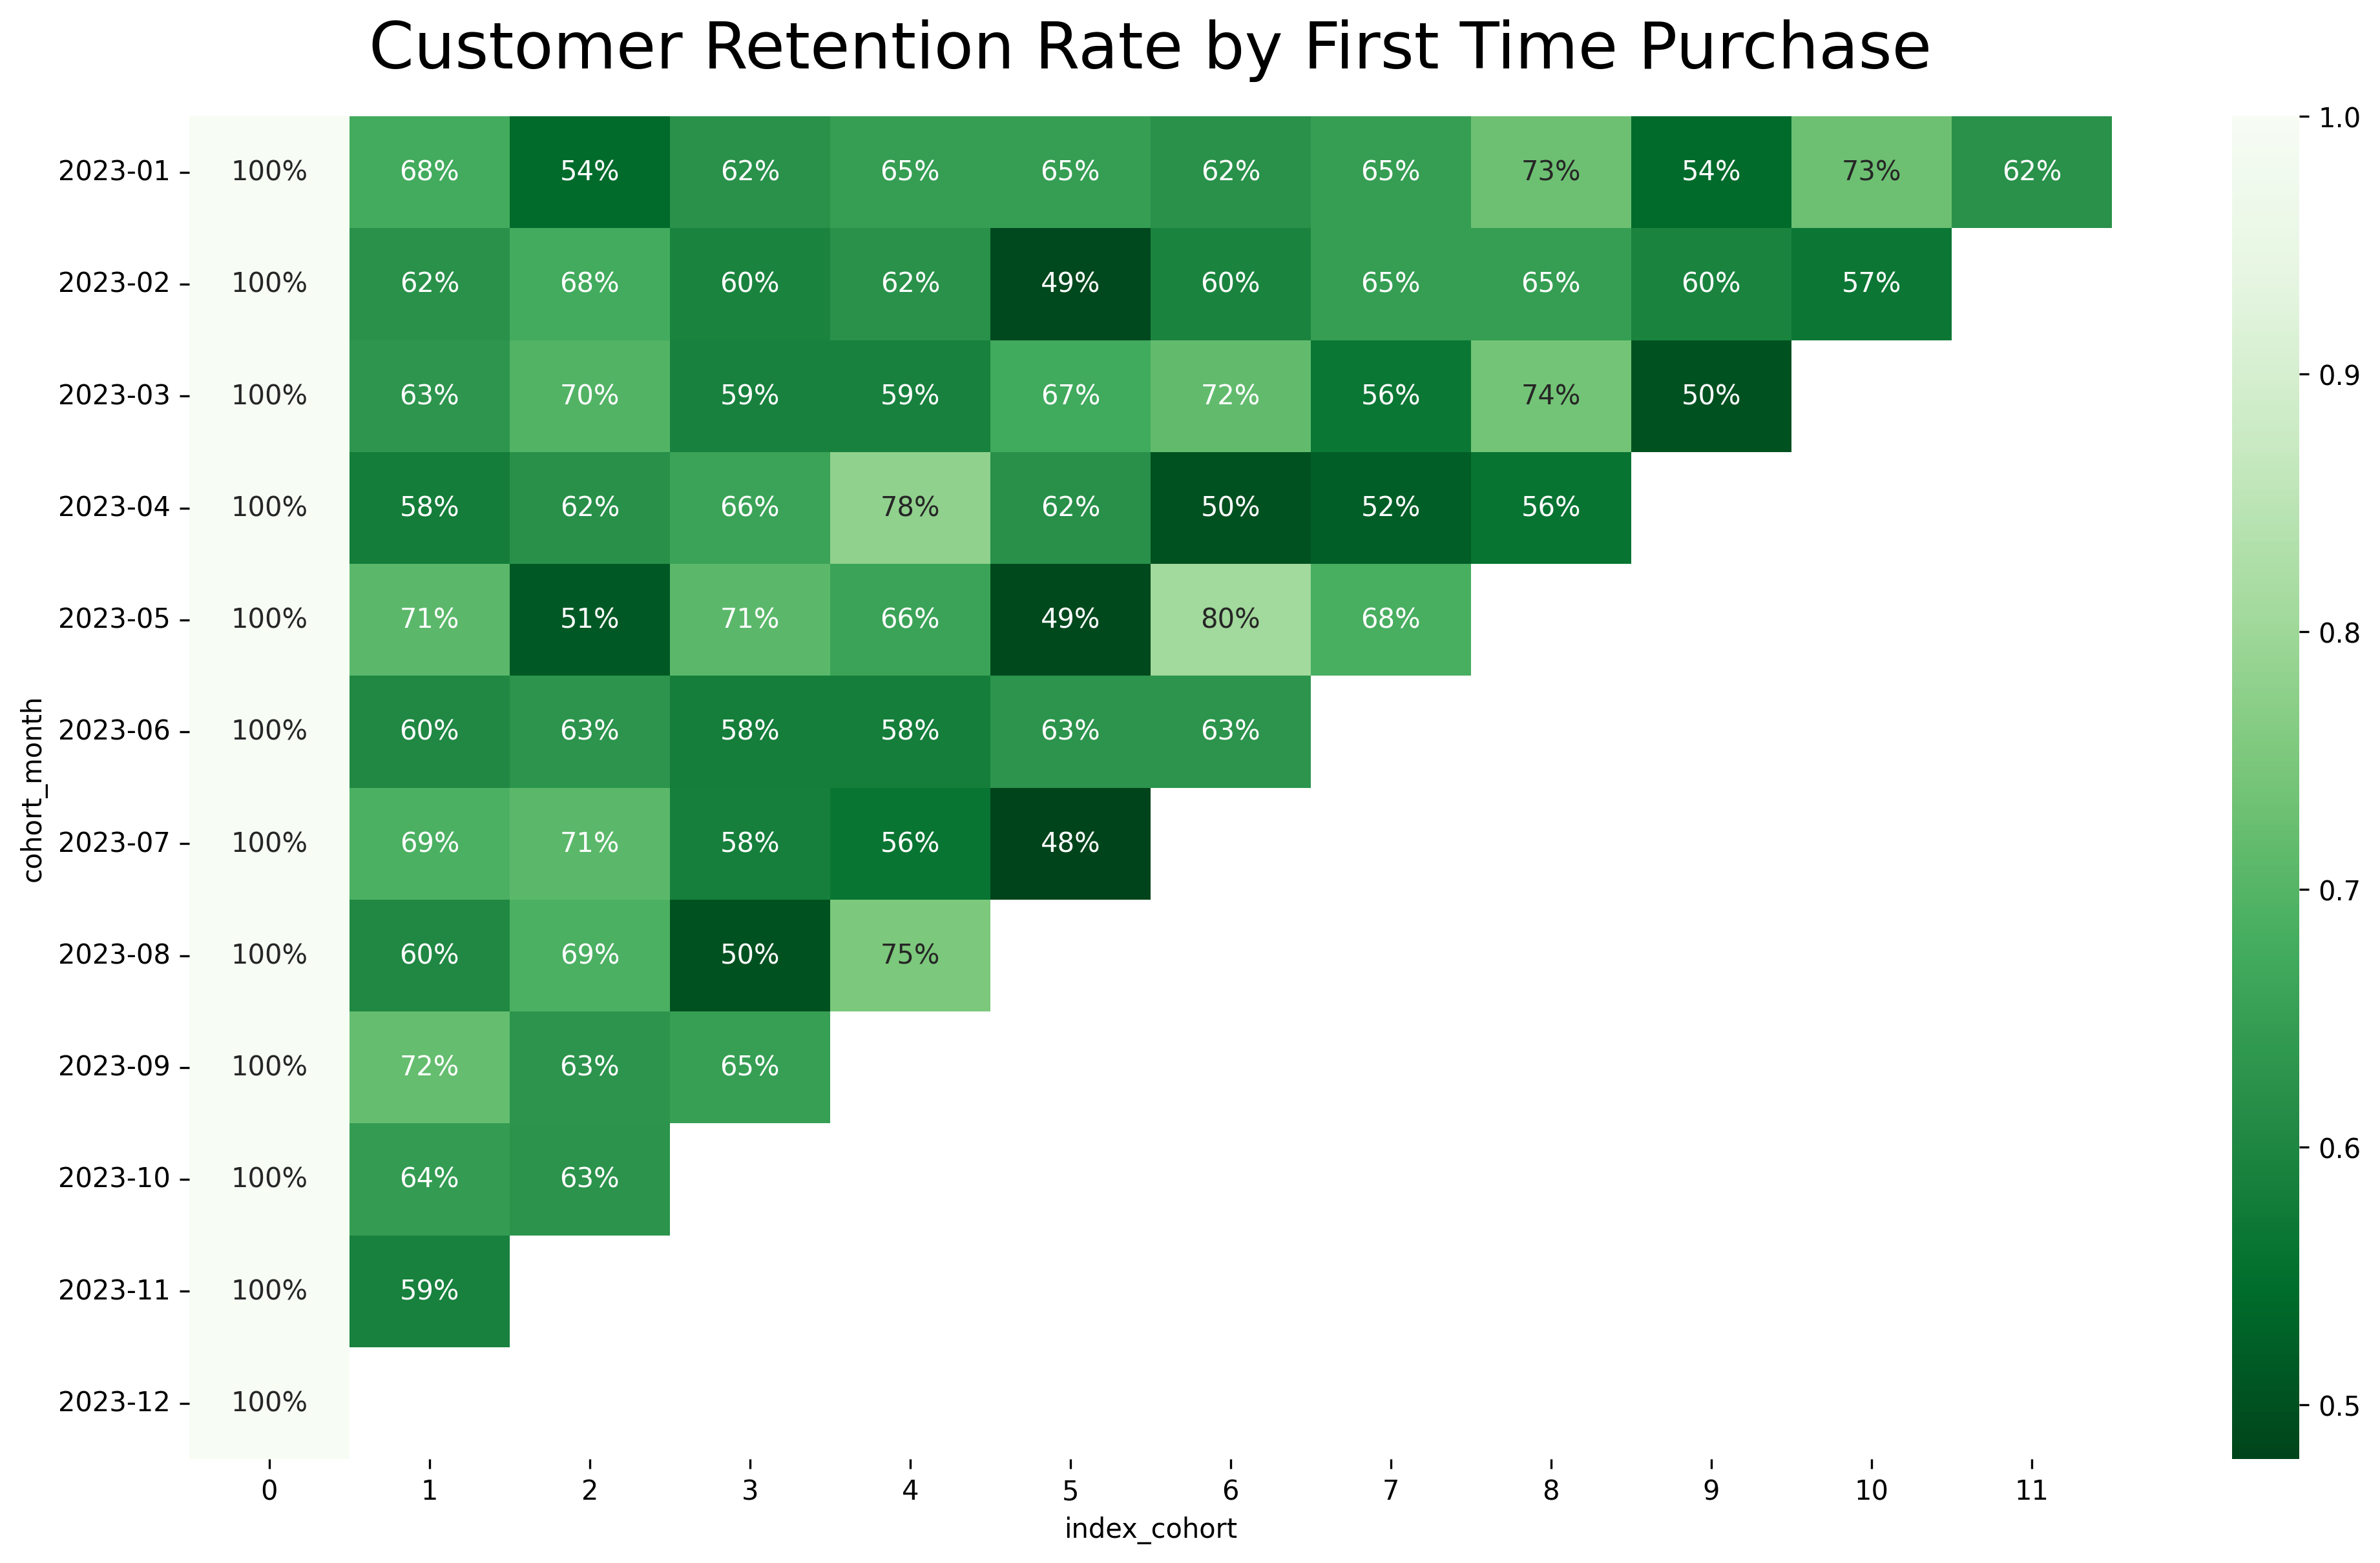

In [28]:
plt.figure(figsize=(16,9), dpi=300)
plt.title('Customer Retention Rate by First Time Purchase', fontsize=24, pad=18)
sns.heatmap(retention.round(3), annot=True, fmt='.0%', cmap='Greens_r')
plt.yticks(rotation=0)
plt.show()

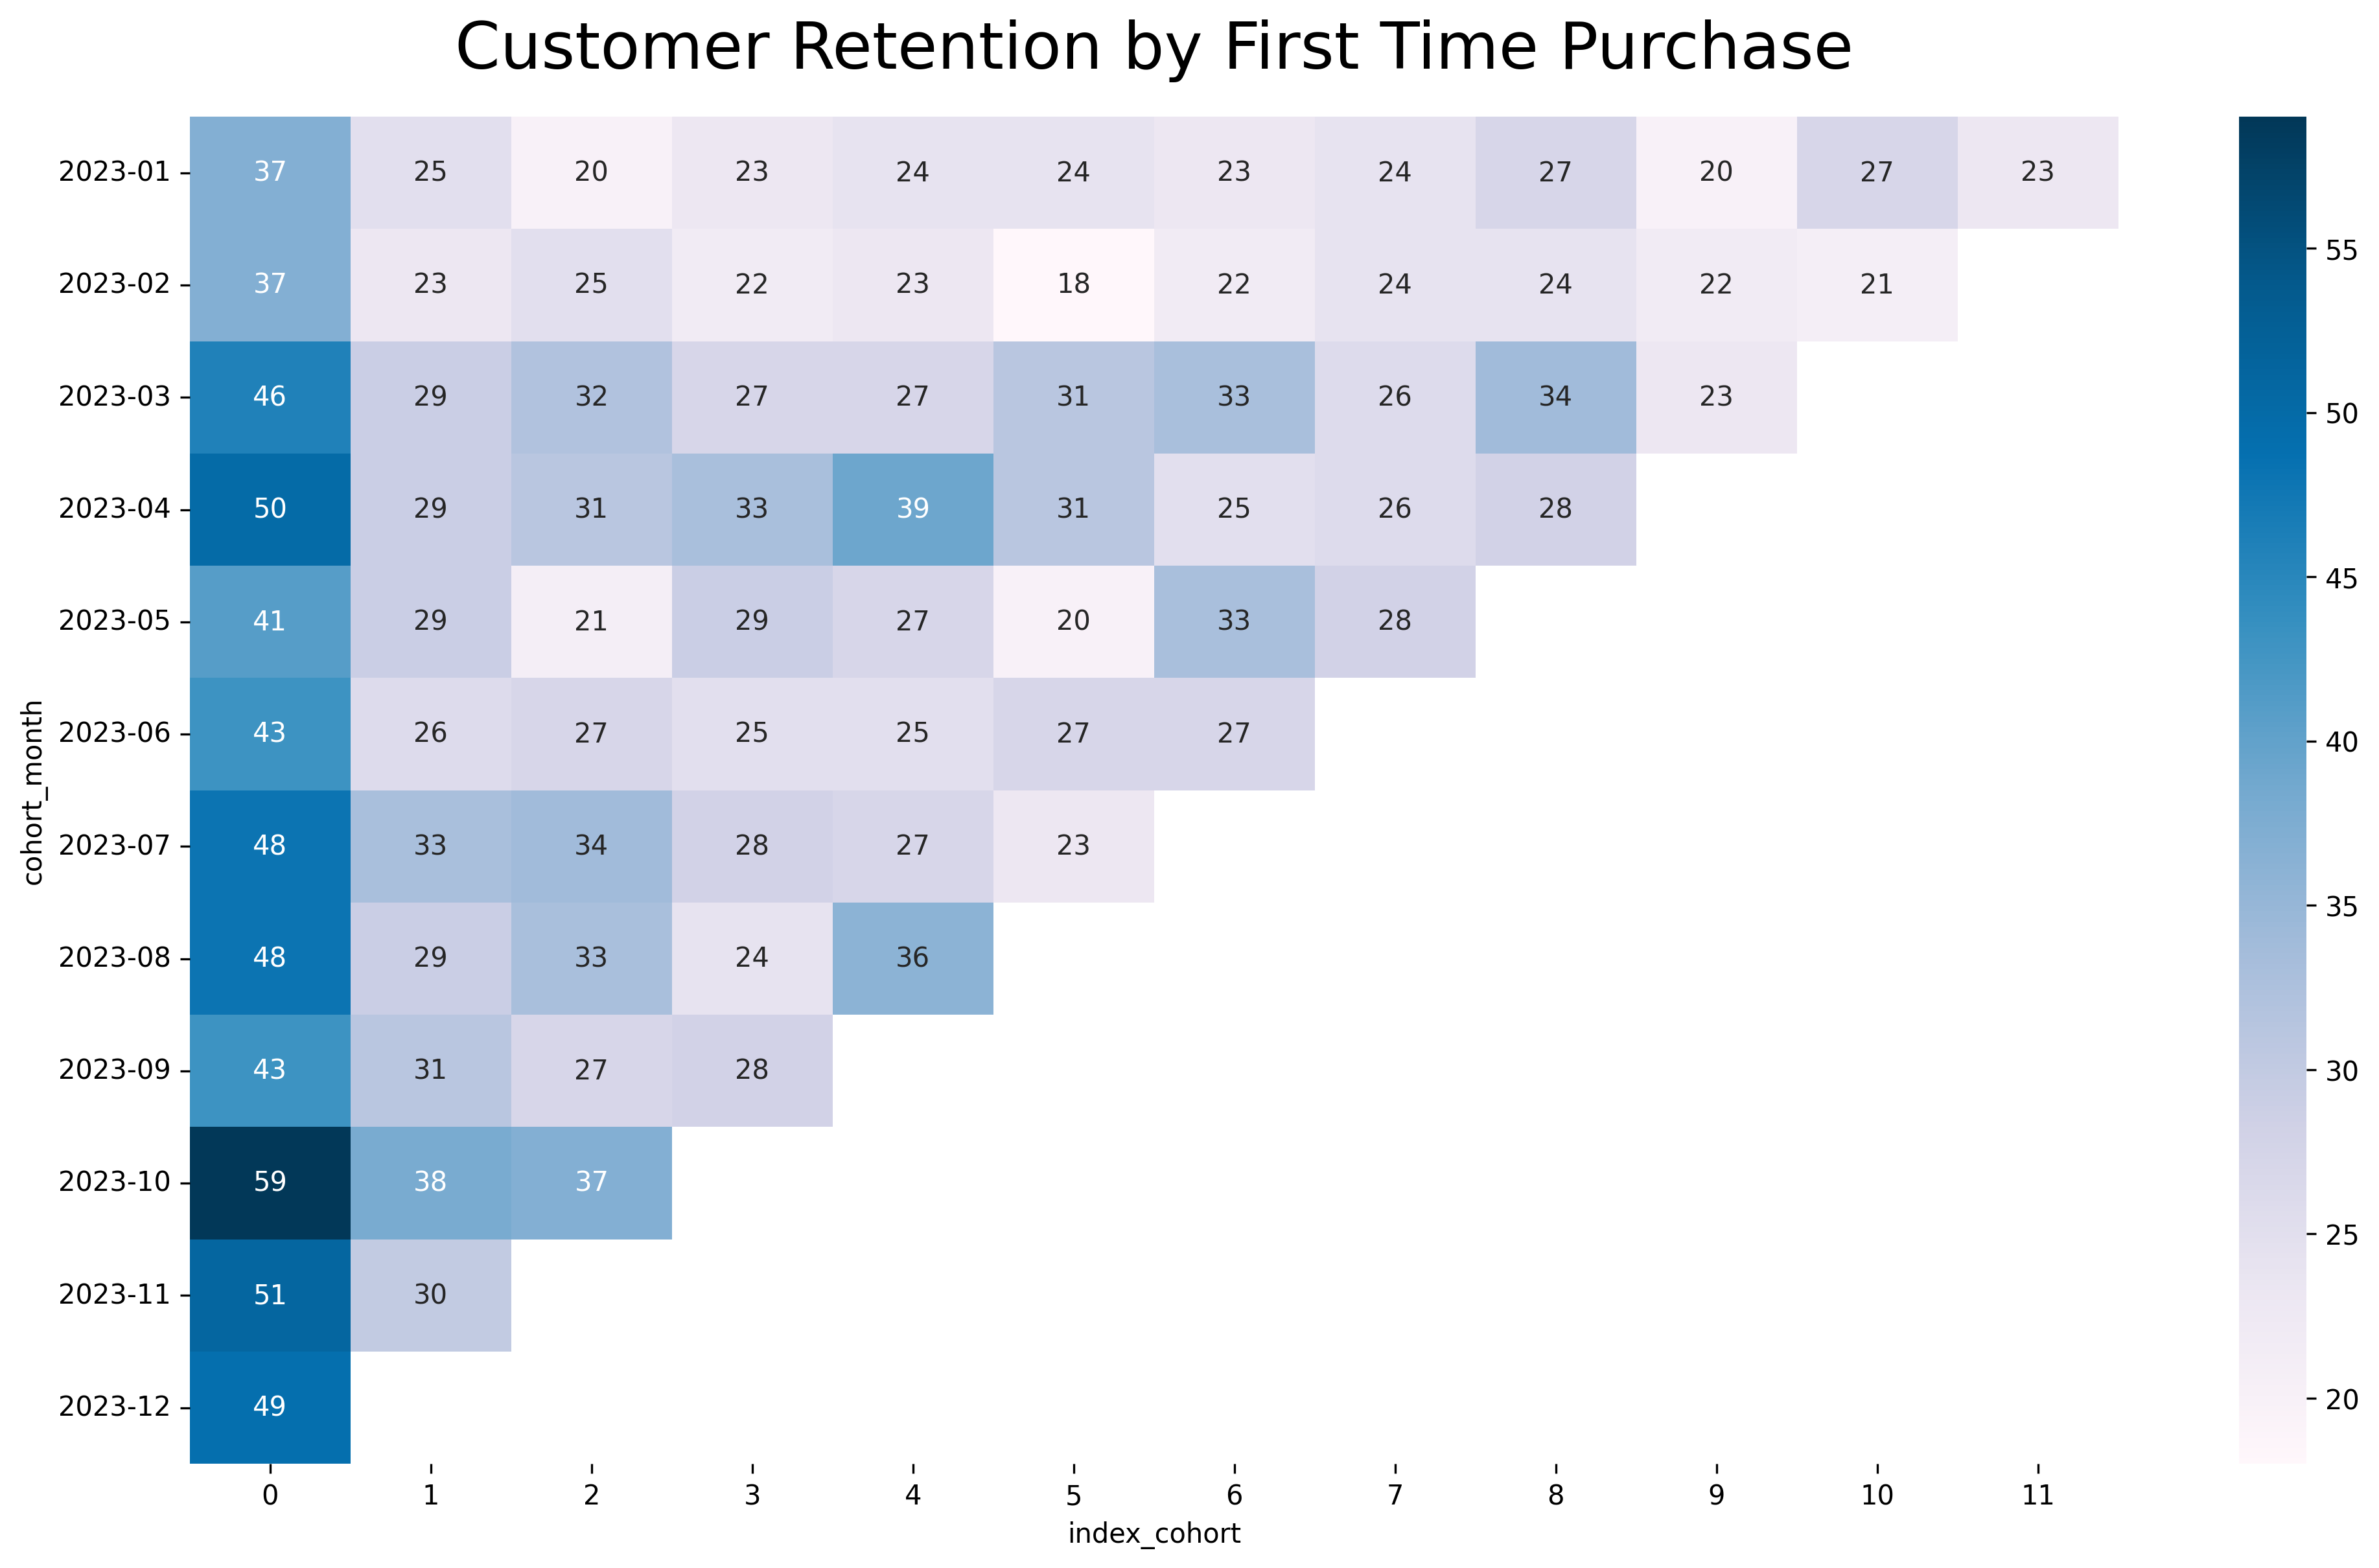

In [29]:
plt.figure(figsize=(16,9), dpi=300)
plt.title('Customer Retention by First Time Purchase', fontsize=24, pad=18)
sns.heatmap(cohort_count, annot=True, cmap='PuBu')
plt.yticks(rotation=0)
plt.show()

# Insights

## Interpretation and Reporting

This cohort table contains twelve month observation where first month is January and the last month is December. The highest amount of acquisition is in October, 59 new customers and the lowest amount of acquisition is in January and February with 37 new customers. In December, almost all cohort month has more than 50% retention which is still acceptable. Only cohort July has 48% retention rate in December. There are 80% of new customers from cohort May comes back to purchase in November which is great.

## Actions

We know that it's a good job to reach 50% retention rate. But, there are still some space we can improve to increase customer retention rate. Retention is where the customers purchase more than one time. Higher retention rate means high frequency of customers purchasing our products. There are some actions we can apply for our marketing strategy, here they are:
- increase customer **satisfaction** by prioritizing great customer service and support.
- improve product from package or feature, build quality or experiences, and ease of use or price to meet the needs of customers.
- apply loyalty programs like membership for personalized experience or special price.

## Further Analysis

- do churn analysis to understand churn rate, identifying what factors make customers stop purchasing or using our products.
- do survival analysis to understand customer lifetime value, predicting how often customers will purchase.
- do comparative analysis like t-test to understand whether the customers with membership do more purchase rather than casual customers.